# Part A 

## Question 1: Polynomial Regression

## a

## 1

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('AutoMpg.csv')
df

,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,1.0,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,1.0,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,1.0,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
397,52.0,44.0,4,97.0,2130,24.6,82,2.0,vw pickup
398,84.0,32.0,4,135.0,2295,11.6,82,1.0,dodge rampage
399,79.0,28.0,4,120.0,2625,18.6,82,1.0,ford ranger
400,82.0,31.0,4,119.0,2720,19.4,82,1.0,chevy s-10


In [2]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 horsepower      16
mpg              0
cylinders        0
displacement     0
weight           0
acceleration     0
model year       0
origin          15
car name         0
dtype: int64


In [3]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df

,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,1.0,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,1.0,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,1.0,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
397,52.0,44.0,4,97.0,2130,24.6,82,2.0,vw pickup
398,84.0,32.0,4,135.0,2295,11.6,82,1.0,dodge rampage
399,79.0,28.0,4,120.0,2625,18.6,82,1.0,ford ranger
400,82.0,31.0,4,119.0,2720,19.4,82,1.0,chevy s-10


In [4]:
most_frequent_origin = df['origin'].mode().iloc[0]
df['origin'].fillna(most_frequent_origin, inplace=True)

print("\nAfter filling missing values in 'origin':")
df.head()


After filling missing values in 'origin':


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,1.0,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,1.0,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,1.0,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,1.0,ford torino


In [5]:
missing_values_after_fill = df.isnull().sum()
print("\nMissing Values After Filling:\n", missing_values_after_fill)


Missing Values After Filling:
 horsepower      0
mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [6]:
def replace_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((series < lower_bound) | (series > upper_bound), series.median(), series)
df['horsepower'] = replace_outliers(df['horsepower'])

In [7]:
duplicate_rows = df.duplicated()
print("\nDuplicate Rows:\n", duplicate_rows)

df.drop_duplicates(inplace=True)
df


Duplicate Rows:
 0      False
1      False
2      False
3      False
4      False
       ...  
397    False
398    False
399    False
400    False
401     True
Length: 402, dtype: bool


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,1.0,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,1.0,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,1.0,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
396,86.0,27.0,4,140.0,2790,15.6,82,1.0,ford mustang gl
397,52.0,44.0,4,97.0,2130,24.6,82,2.0,vw pickup
398,84.0,32.0,4,135.0,2295,11.6,82,1.0,dodge rampage
399,79.0,28.0,4,120.0,2625,18.6,82,1.0,ford ranger


## 2

In [8]:
most_frequent_origin = df['origin'].mode().iloc[0]
df['origin'].fillna(most_frequent_origin, inplace=True)

origin_mapping = {1: 'USA', 2: 'Europe', 3: 'Japan'}
df['origin'] = df['origin'].map(origin_mapping)

print("\nAfter replacing 'origin' values with country names:")
df


After replacing 'origin' values with country names:


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,USA,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,USA,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,USA,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
396,86.0,27.0,4,140.0,2790,15.6,82,USA,ford mustang gl
397,52.0,44.0,4,97.0,2130,24.6,82,Europe,vw pickup
398,84.0,32.0,4,135.0,2295,11.6,82,USA,dodge rampage
399,79.0,28.0,4,120.0,2625,18.6,82,USA,ford ranger


## 3

In [9]:
print("Before creating 'brand' column:")
df.head()

Before creating 'brand' column:


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,USA,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,USA,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,USA,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,USA,ford torino


In [10]:
df['brand'] = df['car name'].str.split().str[0]

In [11]:
brand_mapping = {
    'chevroelt': 'chevrolet',
    'chevy': 'chevrolet',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'hi': 'harvester',
    'maxda': 'mazda',
    'toyouta': 'toyota',
    'mercedes-benz': 'mercedes'
}

df['brand'] = df['brand'].replace(brand_mapping)

print("\nAfter creating 'brand' column:")
df


After creating 'brand' column:


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name,brand
0,130.0,18.0,8,307.0,3504,12.0,70,USA,chevrolet chevelle malibu,chevrolet
1,165.0,15.0,8,350.0,3693,11.5,70,USA,buick skylark 320,buick
2,150.0,18.0,8,318.0,3436,11.0,70,USA,plymouth satellite,plymouth
3,150.0,16.0,8,304.0,3433,12.0,70,USA,amc rebel sst,amc
4,140.0,17.0,8,302.0,3449,10.5,70,USA,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
396,86.0,27.0,4,140.0,2790,15.6,82,USA,ford mustang gl,ford
397,52.0,44.0,4,97.0,2130,24.6,82,Europe,vw pickup,volkswagen
398,84.0,32.0,4,135.0,2295,11.6,82,USA,dodge rampage,dodge
399,79.0,28.0,4,120.0,2625,18.6,82,USA,ford ranger,ford


# b

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['horsepower']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Model Evaluation:
RMSE (Root Mean Squared Error): 4.76
R2 Score: 0.61


# c

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['horsepower']]
y = df['mpg']

degrees = [2, 5, 10, 20]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\nPolynomial Degree: {degree}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")


Polynomial Degree: 2
RMSE (Root Mean Squared Error): 4.24
R2 Score: 0.69

Polynomial Degree: 5
RMSE (Root Mean Squared Error): 4.13
R2 Score: 0.70

Polynomial Degree: 10
RMSE (Root Mean Squared Error): 5.21
R2 Score: 0.53

Polynomial Degree: 20
RMSE (Root Mean Squared Error): 35.95
R2 Score: -21.51


Based on these findings, a polynomial degree of five appears to function effectively, exhibiting a decent R2 score and a relatively low RMSE. But as we can see from the noticeably greater RMSE and negative R2 score, going up to 10 or 20 degrees causes overfitting. To prevent overfitting and guarantee adequate generalization to unobserved data, model complexity must be balanced.

# d


Polynomial Degree: 2
RMSE (Root Mean Squared Error): 4.24
R2 Score: 0.69


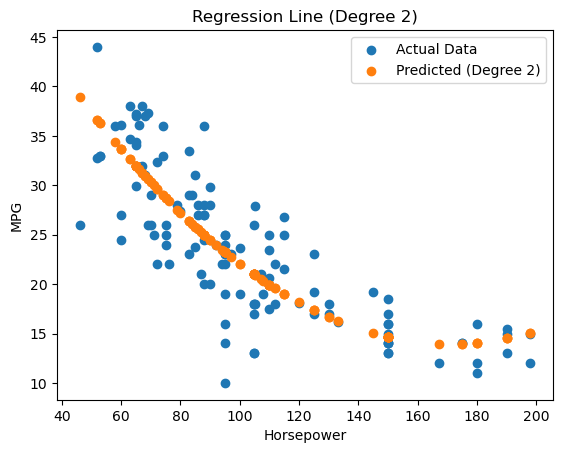


Polynomial Degree: 5
RMSE (Root Mean Squared Error): 4.13
R2 Score: 0.70


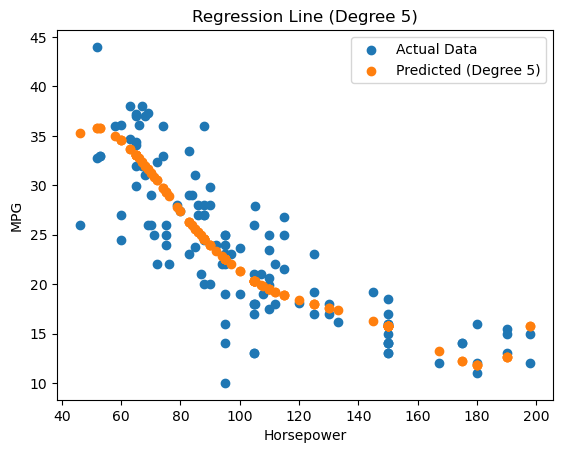


Polynomial Degree: 10
RMSE (Root Mean Squared Error): 5.21
R2 Score: 0.53


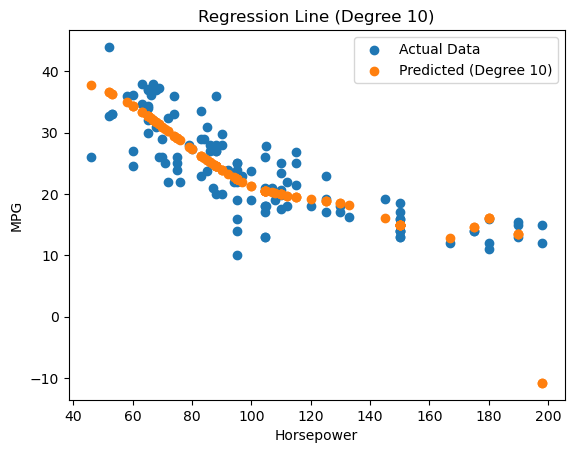


Polynomial Degree: 20
RMSE (Root Mean Squared Error): 35.95
R2 Score: -21.51


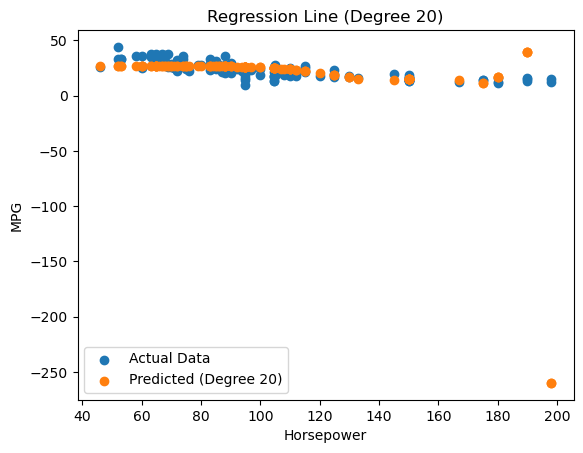

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

degrees = [2, 5, 10, 20]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)
    
    X_test_poly = poly.transform(X_test)
    
    y_pred = model_poly.predict(X_test_poly)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f'\nPolynomial Degree: {degree}')
    print(f'RMSE (Root Mean Squared Error): {rmse:.2f}')
    print(f'R2 Score: {r2:.2f}')
    
    plt.scatter(X_test, y_test, label='Actual Data')
    plt.scatter(X_test, y_pred, label=f'Predicted (Degree {degree})')
    plt.title(f'Regression Line (Degree {degree})')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
    plt.show()

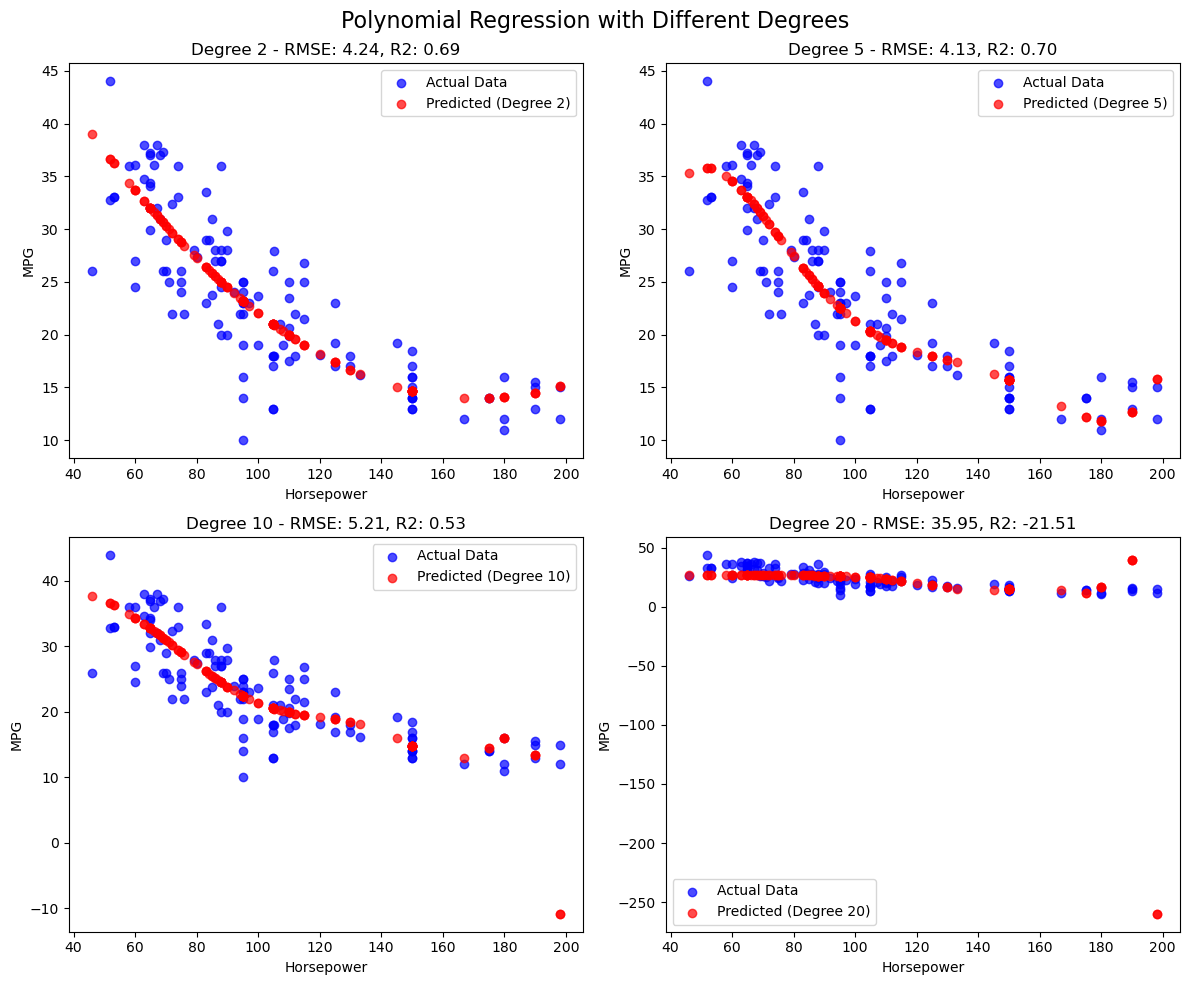

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

degrees = [2, 5, 10, 20]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Polynomial Regression with Different Degrees', fontsize=16)

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)
    
    X_test_poly = poly.transform(X_test)
    
    y_pred = model_poly.predict(X_test_poly)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    row = (i - 1) // 2
    col = (i - 1) % 2
    ax = axes[row, col]
    
    ax.scatter(X_test, y_test, label='Actual Data', color='blue', alpha=0.7)
    ax.scatter(X_test, y_pred, label=f'Predicted (Degree {degree})', color='red', alpha=0.7)
    ax.set_title(f'Degree {degree} - RMSE: {rmse:.2f}, R2: {r2:.2f}')
    ax.set_xlabel('Horsepower')
    ax.set_ylabel('MPG')
    ax.legend()

plt.tight_layout()
plt.show()

/Users/aakashsukre/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/aakashsukre/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/aakashsukre/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/aakashsukre/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


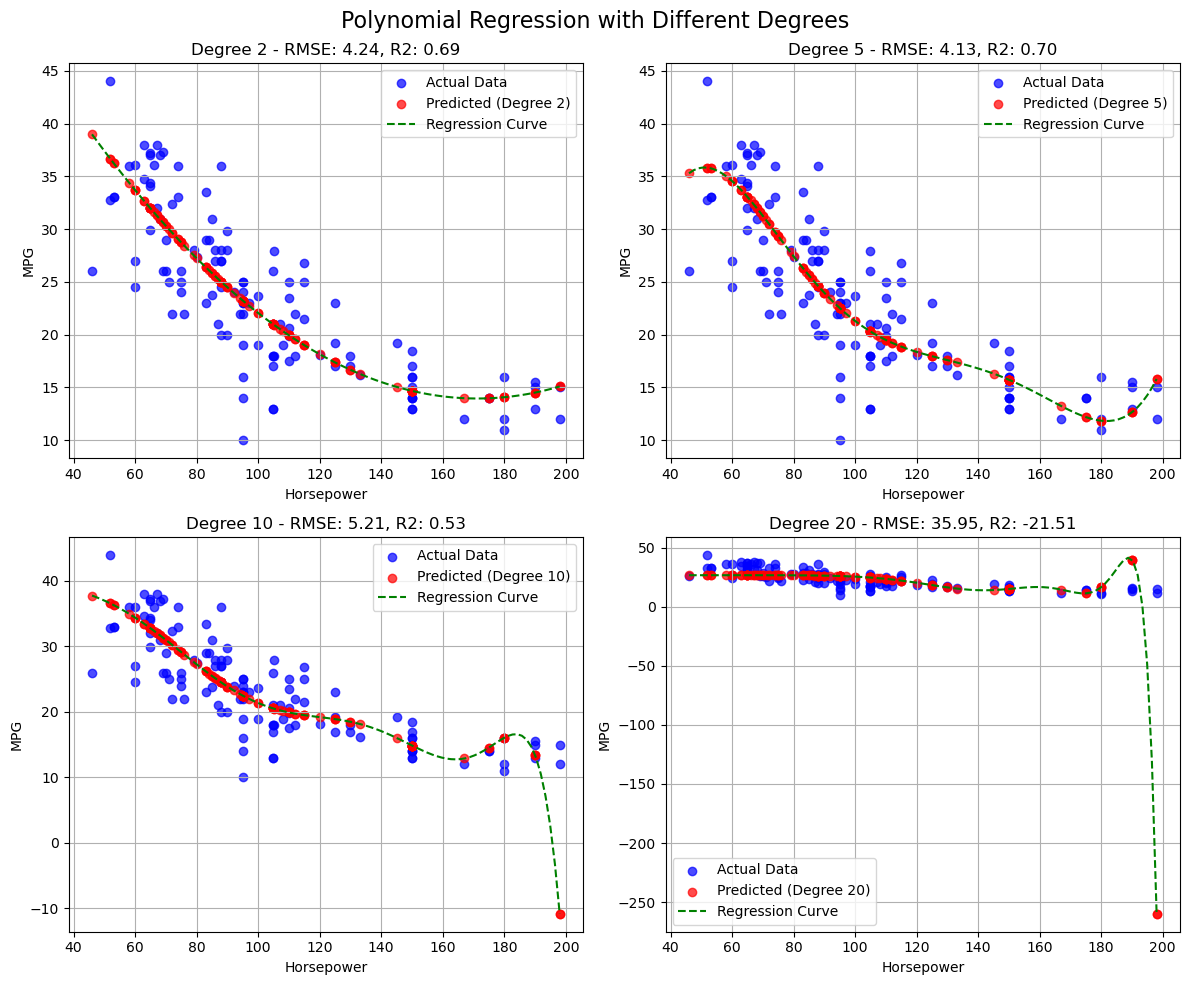

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

degrees = [2, 5, 10, 20]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Polynomial Regression with Different Degrees', fontsize=16)

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=degree, include_bias=False)  # Set include_bias to False
    X_poly = poly.fit_transform(X_train)
    
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)
    
    X_test_poly = poly.transform(X_test)
    
    y_pred = model_poly.predict(X_test_poly)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    row = (i - 1) // 2
    col = (i - 1) % 2
    ax = axes[row, col]
    
    ax.scatter(X_test, y_test, label='Actual Data', color='blue', alpha=0.7)
    ax.scatter(X_test, y_pred, label=f'Predicted (Degree {degree})', color='red', alpha=0.7)
    
    x_curve = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
    X_curve_poly = poly.transform(x_curve)
    y_curve_pred = model_poly.predict(X_curve_poly)
    
    ax.plot(x_curve, y_curve_pred, linestyle='--', color='green', label='Regression Curve')
    
    ax.set_title(f'Degree {degree} - RMSE: {rmse:.2f}, R2: {r2:.2f}')
    ax.set_xlabel('Horsepower')
    ax.set_ylabel('MPG')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Question 2: Multiple Linear Regression

# a

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

features = ['horsepower', 'displacement', 'weight', 'acceleration']
target = 'mpg'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Before Normalization:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_normalized = LinearRegression()
model_normalized.fit(X_train_scaled, y_train)

y_pred_normalized = model_normalized.predict(X_test_scaled)
rmse_normalized = np.sqrt(mean_squared_error(y_test, y_pred_normalized))
r2_normalized = r2_score(y_test, y_pred_normalized)
print("\nAfter Normalization:")
print(f"RMSE: {rmse_normalized:.2f}")
print(f"R2 Score: {r2_normalized:.2f}")

Before Normalization:
RMSE: 3.98
R2 Score: 0.72

After Normalization:
RMSE: 3.98
R2 Score: 0.72


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

features = ['horsepower', 'displacement', 'weight', 'acceleration']
target = 'mpg'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Before Normalization:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

model_standard = LinearRegression()
model_standard.fit(X_train_standard, y_train)

y_pred_standard = model_standard.predict(X_test_standard)
rmse_standard = np.sqrt(mean_squared_error(y_test, y_pred_standard))
r2_standard = r2_score(y_test, y_pred_standard)
print("\nAfter Standardization:")
print(f"RMSE: {rmse_standard:.2f}")
print(f"R2 Score: {r2_standard:.2f}")

scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)

y_pred_minmax = model_minmax.predict(X_test_minmax)
rmse_minmax = np.sqrt(mean_squared_error(y_test, y_pred_minmax))
r2_minmax = r2_score(y_test, y_pred_minmax)
print("\nAfter Min-Max Scaling:")
print(f"RMSE: {rmse_minmax:.2f}")
print(f"R2 Score: {r2_minmax:.2f}")

Before Normalization:
RMSE: 3.98
R2 Score: 0.72

After Standardization:
RMSE: 3.98
R2 Score: 0.72

After Min-Max Scaling:
RMSE: 3.98
R2 Score: 0.72


# b 

In [19]:
coefficients = model.coef_

coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()

sorted_coefficients = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

top_two_features = sorted_coefficients['Feature'].head(2).tolist()
print(f"The two most influential factors in MPG prediction are: {top_two_features}")

The two most influential factors in MPG prediction are: ['horsepower', 'acceleration']


# c

In [20]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['horsepower', 'displacement', 'weight', 'acceleration']
target = 'mpg'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)

print(f"RMSE for PCA-based prediction: {rmse_pca:.2f}")
print(f"R2 Score for PCA-based prediction: {r2_pca:.2f}")

RMSE for PCA-based prediction: 3.98
R2 Score for PCA-based prediction: 0.72


# d

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['horsepower', 'displacement', 'weight', 'acceleration']
categorical_features = ['origin', 'cylinders']
target = 'mpg'

X = df[numeric_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_with_categorical = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_with_categorical.fit(X_train, y_train)

y_pred_with_categorical = model_with_categorical.predict(X_test)
rmse_with_categorical = np.sqrt(mean_squared_error(y_test, y_pred_with_categorical))
r2_with_categorical = r2_score(y_test, y_pred_with_categorical)

print(f"RMSE for model with categorical variables: {rmse_with_categorical:.2f}")
print(f"R2 Score for model with categorical variables: {r2_with_categorical:.2f}")

RMSE for model with categorical variables: 3.95
R2 Score for model with categorical variables: 0.73


# e

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = ['horsepower', 'displacement', 'weight', 'acceleration']
categorical_features = ['origin', 'cylinders', 'brand', 'model year']
target = 'mpg'

X = df[numeric_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_with_additional_features = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_with_additional_features.fit(X_train, y_train)

y_pred_with_additional_features = model_with_additional_features.predict(X_test)
rmse_with_additional_features = np.sqrt(mean_squared_error(y_test, y_pred_with_additional_features))
r2_with_additional_features = r2_score(y_test, y_pred_with_additional_features)

print(f"RMSE for model with additional features: {rmse_with_additional_features:.2f}")
print(f"R2 Score for model with additional features: {r2_with_additional_features:.2f}")

RMSE for model with additional features: 3.35
R2 Score for model with additional features: 0.80


/Users/aakashsukre/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Part B: Classification – Decision Trees

# 1

In [25]:
df['FEGroup'] = pd.qcut(df['mpg'], q=[0, 0.1, 1.0], labels=['high-fuel', 'low-fuel'])
df[['mpg', 'FEGroup']]

,mpg,FEGroup
0,18.0,low-fuel
1,15.0,low-fuel
2,18.0,low-fuel
3,16.0,low-fuel
4,17.0,low-fuel
...,...,...
396,27.0,low-fuel
397,44.0,low-fuel
398,32.0,low-fuel
399,28.0,low-fuel


# 2 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = ['horsepower', 'weight', 'acceleration', 'cylinders', 'origin']
target = 'FEGroup'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_features = ['origin']
numeric_features = ['horsepower', 'weight', 'acceleration', 'cylinders']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNeighborsClassifier: {accuracy:.2f}')

Accuracy of the KNeighborsClassifier: 0.93


# 3 

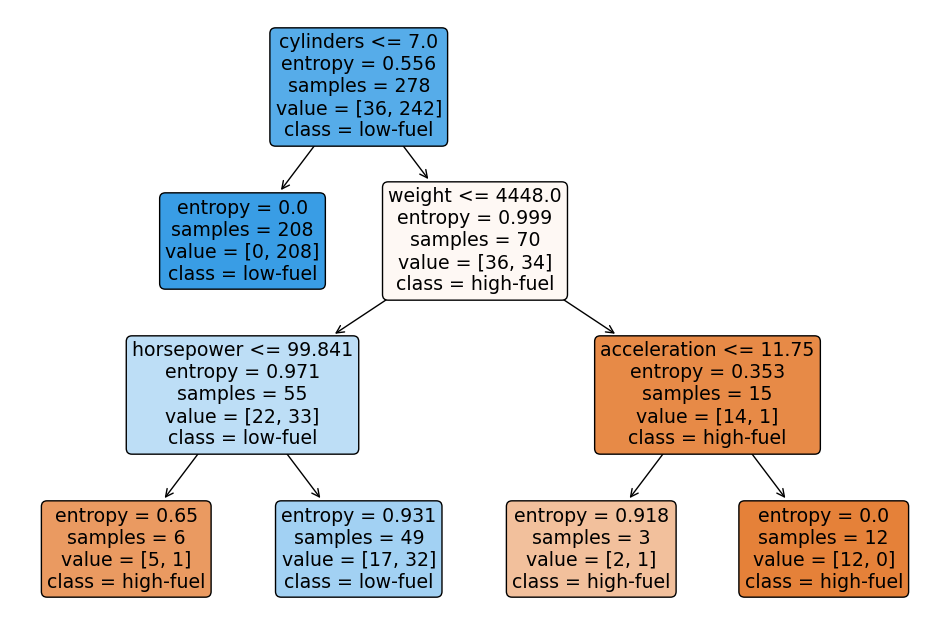

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

features = ['horsepower', 'weight', 'acceleration', 'cylinders', 'origin']
target = 'FEGroup'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_features = ['origin']
numeric_features = ['horsepower', 'weight', 'acceleration', 'cylinders']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=3))
])

model.fit(X_train, y_train)

feature_names = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

y_pred = model.predict(X_test)

plt.figure(figsize=(12, 8))
plot_tree(model.named_steps['classifier'], feature_names=feature_names,
          class_names=model.named_steps['classifier'].classes_, filled=True, rounded=True)
plt.show()

# 4 

Accuracy: 0.92


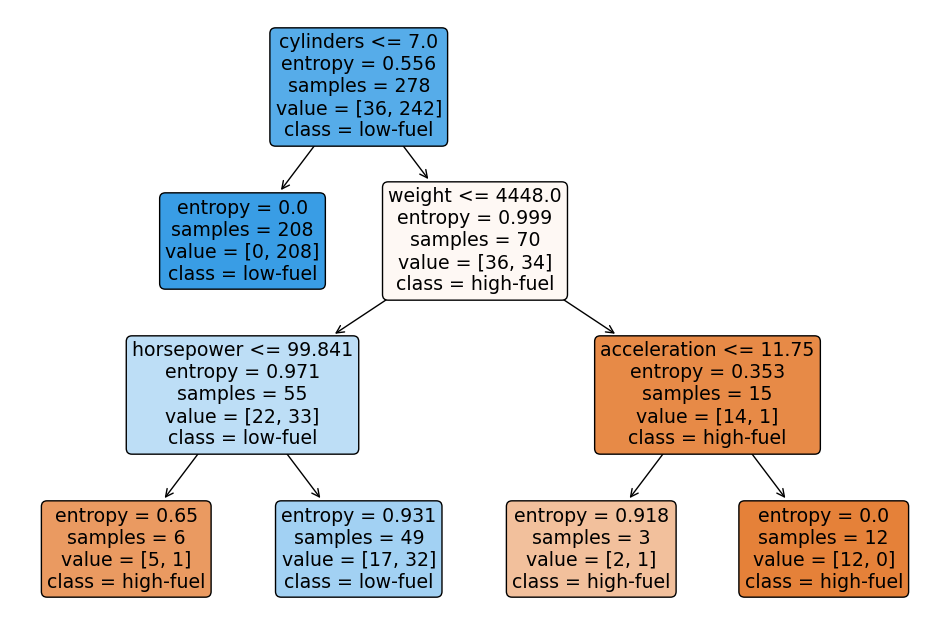

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


features = ['horsepower', 'weight', 'acceleration', 'cylinders', 'origin']
target = 'FEGroup'

np.random.seed(42)

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_features = ['origin']
numeric_features = ['horsepower', 'weight', 'acceleration', 'cylinders']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=3))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(model.named_steps['classifier'], feature_names=numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)),
          class_names=model.named_steps['classifier'].classes_, filled=True, rounded=True)
plt.show()

# 5 

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

np.random.seed(42)

max_depth_values = [3, 5, 8]

for max_depth in max_depth_values:
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=max_depth))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for max_depth = {max_depth}:\n")
    print(classification_report(y_test, y_pred))
    print("="*60)

Classification Report for max_depth = 3:

              precision    recall  f1-score   support

   high-fuel       0.80      0.50      0.62        16
    low-fuel       0.93      0.98      0.95       104

    accuracy                           0.92       120
   macro avg       0.86      0.74      0.78       120
weighted avg       0.91      0.92      0.91       120

Classification Report for max_depth = 5:

              precision    recall  f1-score   support

   high-fuel       0.57      0.50      0.53        16
    low-fuel       0.92      0.94      0.93       104

    accuracy                           0.88       120
   macro avg       0.75      0.72      0.73       120
weighted avg       0.88      0.88      0.88       120

Classification Report for max_depth = 8:

              precision    recall  f1-score   support

   high-fuel       0.50      0.31      0.38        16
    low-fuel       0.90      0.95      0.93       104

    accuracy                           0.87       120
  

# Part B 

## Question 1: K-Means Clustering

# 1

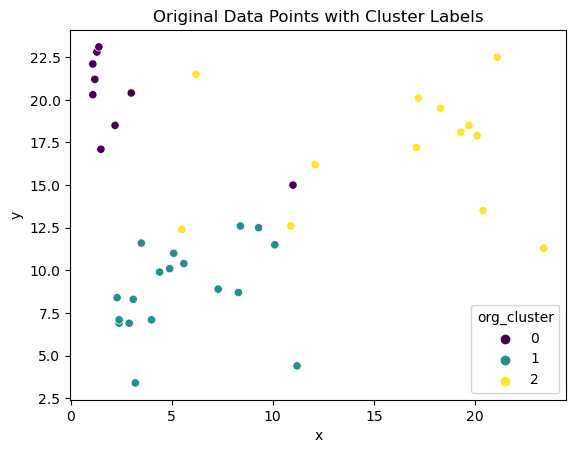

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('question_1.csv')

sns.scatterplot(x='x', y='y', hue='org_cluster', data=data, palette='viridis')
plt.title('Original Data Points with Cluster Labels')
plt.show()

# 2

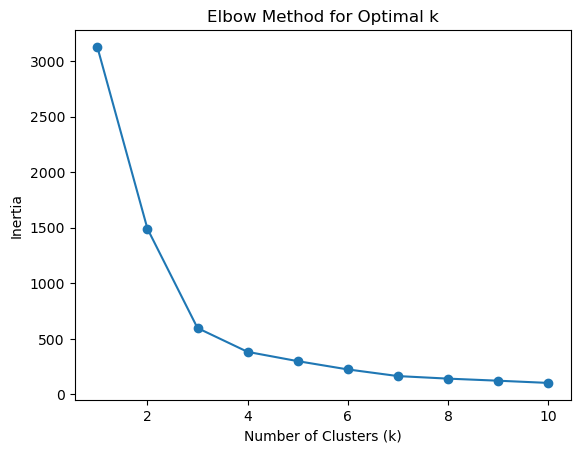

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = data[['x', 'y']]
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # Explicitly set n_init
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# 3

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

X = data[['x', 'y']]

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)  # Set n_init explicitly
kmeans_labels = kmeans.fit_predict(X)

rand_index = adjusted_rand_score(data['org_cluster'], kmeans_labels)
print(f"Rand Index: {rand_index:.2f}")

silhouette_avg = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Rand Index: 0.71
Silhouette Score: 0.61


# 4 

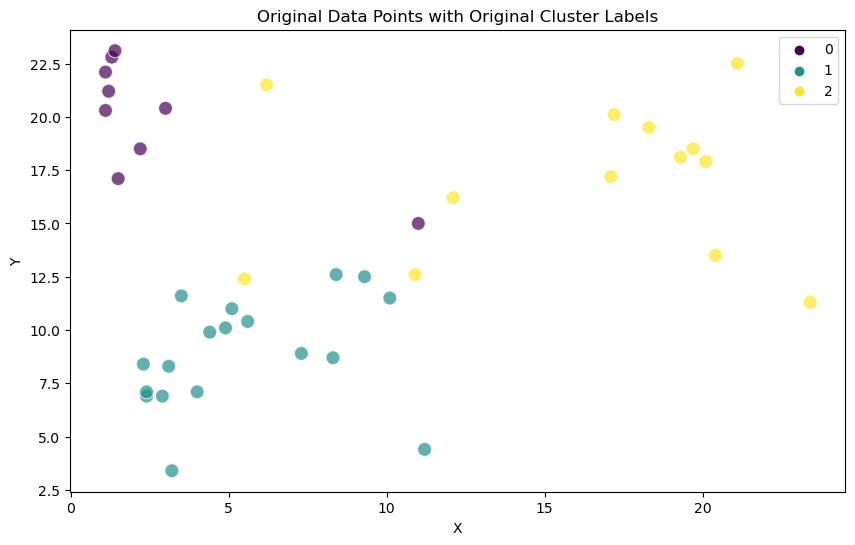

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

data['cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='x', y='y', hue='org_cluster', palette='viridis', marker='o', s=100, alpha=0.7)
plt.title('Original Data Points with Original Cluster Labels')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [35]:
import plotly.express as px

data['cluster'] = kmeans.labels_

fig = px.scatter(data, x='x', y='y', color='org_cluster',
                 title='Original Data Points with Original Cluster Labels')

fig.add_trace(px.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                         color=['Centroid'] * len(kmeans.cluster_centers_),
                         size=[10] * len(kmeans.cluster_centers_),
                         opacity=1).data[0])

fig.update_layout(showlegend=False)
fig.show()

## Question 2: K-Means Clustering

## 1

In [36]:
import pandas as pd

df = pd.read_csv('question_2.csv')
columns_to_drop = ['NAME', 'MANUF', 'TYPE', 'RATING']
df = df.drop(columns=columns_to_drop)
df

,CALORIES,PROTEIN,FAT,SODIUM,FIBER,CARBO,SUGARS,POTASS,VITAMINS,SHELF,WEIGHT,CUPS
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


## 2

In [37]:
from sklearn.cluster import KMeans
random_seed = 0

n_clusters = 5
n_init = 5
max_iter = 100

features_for_clustering = ['CALORIES', 'PROTEIN', 'FAT', 'SODIUM', 'FIBER', 'CARBO', 'SUGARS', 'POTASS', 'VITAMINS', 'WEIGHT', 'CUPS']
X = df[features_for_clustering]

kmeans_model = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, random_state=random_seed)
df['config1'] = kmeans_model.fit_predict(X)
df

,CALORIES,PROTEIN,FAT,SODIUM,FIBER,CARBO,SUGARS,POTASS,VITAMINS,SHELF,WEIGHT,CUPS,config1
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,2
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,0
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,0
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,3
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,1
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,3
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,4


## 3

In [38]:
n_init_new = 100
max_iter_new = 100

kmeans_model_new = KMeans(n_clusters=n_clusters, n_init=n_init_new, max_iter=max_iter_new, random_state=random_seed)
df['config2'] = kmeans_model_new.fit_predict(X)
df

,CALORIES,PROTEIN,FAT,SODIUM,FIBER,CARBO,SUGARS,POTASS,VITAMINS,SHELF,WEIGHT,CUPS,config1,config2
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0,4
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,2,2
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,0,4
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,0,4
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,3,0
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,1,3
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,3,1
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,4,1


## 4 

In [39]:
n_clusters_new = 3
kmeans_model_new = KMeans(n_clusters=n_clusters_new, n_init=n_init, max_iter=max_iter, random_state=random_seed)
df['config3'] = kmeans_model_new.fit_predict(X)
df

,CALORIES,PROTEIN,FAT,SODIUM,FIBER,CARBO,SUGARS,POTASS,VITAMINS,SHELF,WEIGHT,CUPS,config1,config2,config3
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0,4,2
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,2,2,1
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,0,4,2
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,0,4,2
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,3,0,0
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,1,3,0
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,3,1,0
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,4,1,0


## Question 3: DBSCAN Clustering Algorithm

# 1

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
df = pd.read_csv('question_3.csv')
df

,ID,x,y
0,1150,-8.667331,41.149643
1,1151,-8.666030,41.153057
2,1152,-8.669282,41.152732
3,1153,-8.664242,41.150455
4,1154,-8.663267,41.152894
...,...,...,...
317,1470,-8.688467,41.151431
318,1471,-8.679037,41.156146
319,1473,-8.606201,41.139888
320,1474,-8.574660,41.145253


In [41]:
df = df.drop('ID', axis=1)
X = df[['x', 'y']]

n_clusters = 7
n_init = 5
max_iter = 100
random_seed = 0

kmeans_model = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, random_state=random_seed)
df['k-means'] = kmeans_model.fit_predict(X)
df

,x,y,k-means
0,-8.667331,41.149643,2
1,-8.666030,41.153057,2
2,-8.669282,41.152732,2
3,-8.664242,41.150455,2
4,-8.663267,41.152894,2
...,...,...,...
317,-8.688467,41.151431,5
318,-8.679037,41.156146,5
319,-8.606201,41.139888,6
320,-8.574660,41.145253,6


## 2

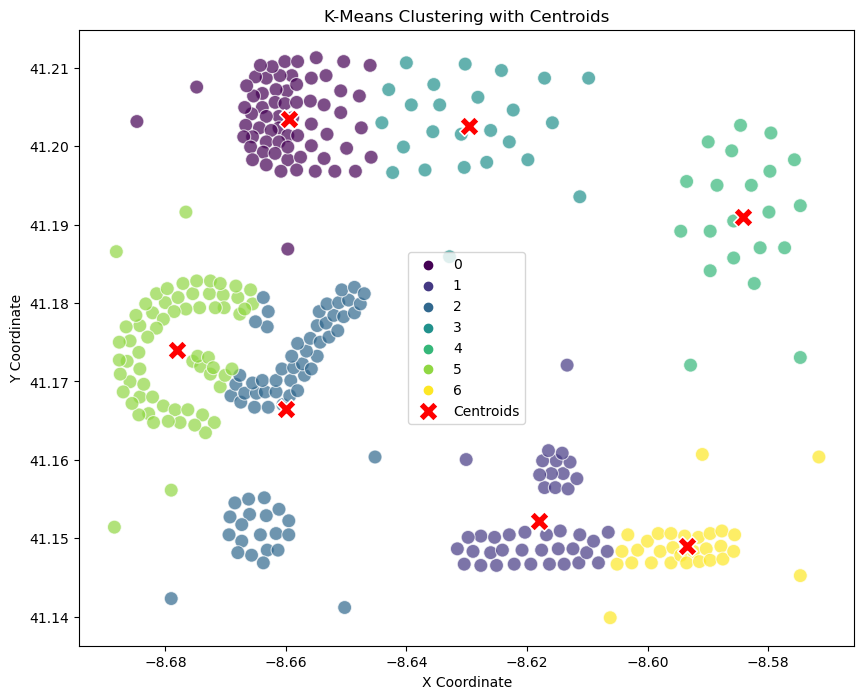

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0, n_init=5, max_iter=100)
df['k-means'] = kmeans.fit_predict(df[['x', 'y']])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='k-means', data=df, palette='viridis', legend='full', s=100, alpha=0.7)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

## 3

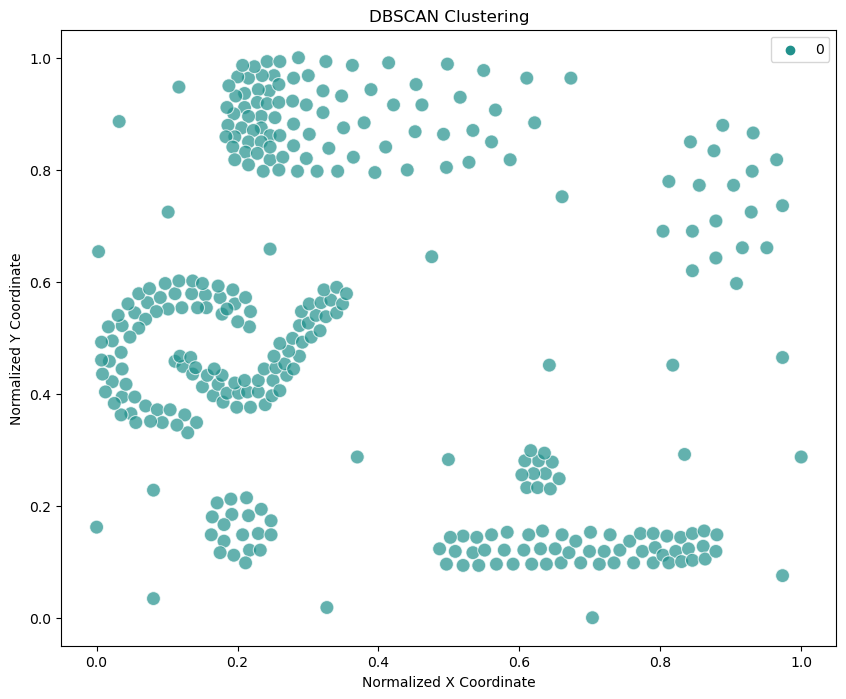

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

scaler = MinMaxScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])

dbscan = DBSCAN(eps=0.4, min_samples=4, metric='euclidean')
df['dbscan1'] = dbscan.fit_predict(df[['x', 'y']])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='dbscan1', data=df, palette='viridis', legend='full', s=100, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Normalized X Coordinate')
plt.ylabel('Normalized Y Coordinate')
plt.legend()
plt.show()

## 4 

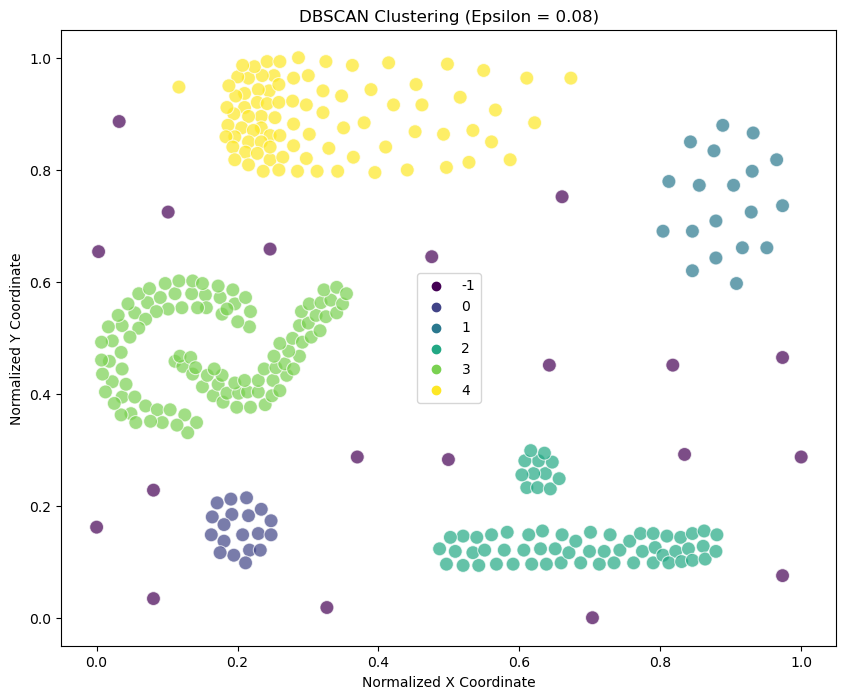

In [44]:
# Create DBSCAN model with epsilon=0.08
dbscan = DBSCAN(eps=0.08, min_samples=4, metric='euclidean')
df['dbscan2'] = dbscan.fit_predict(df[['x', 'y']])

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='dbscan2', data=df, palette='viridis', legend='full', s=100, alpha=0.7)
plt.title('DBSCAN Clustering (Epsilon = 0.08)')
plt.xlabel('Normalized X Coordinate')
plt.ylabel('Normalized Y Coordinate')
plt.legend()
plt.show()

## 5 

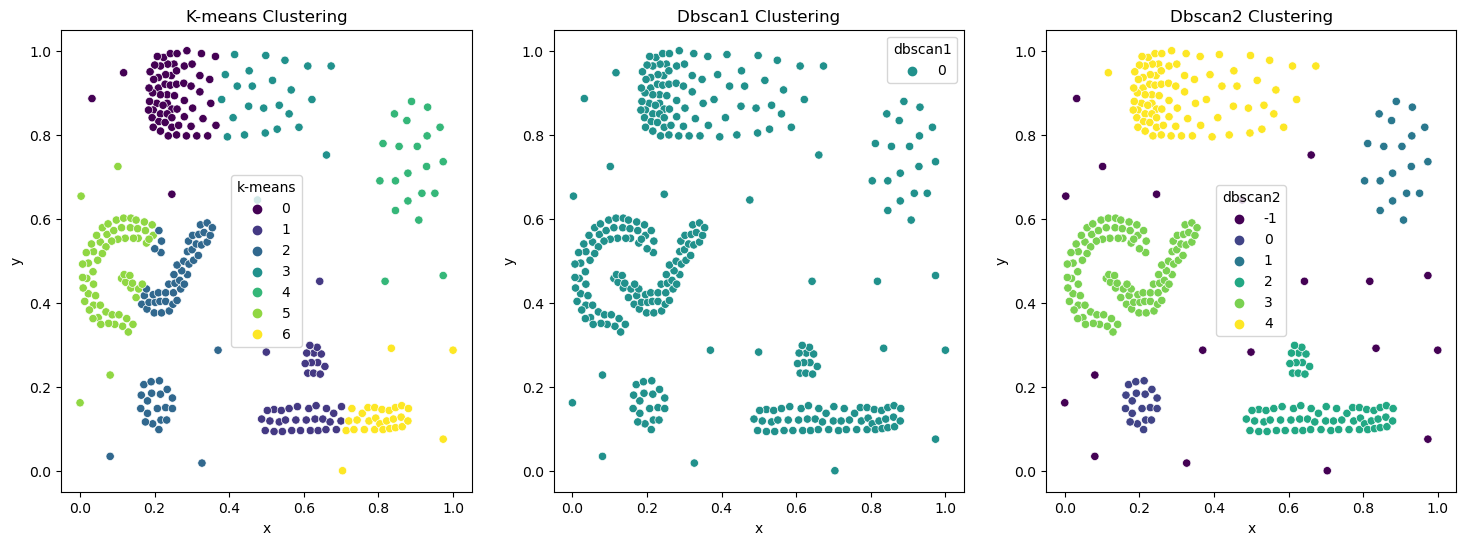

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

df['dbscan1'] = DBSCAN(eps=0.4, min_samples=4, metric='euclidean').fit_predict(df[['x', 'y']])
df['dbscan2'] = DBSCAN(eps=0.08, min_samples=4, metric='euclidean').fit_predict(df[['x', 'y']])

plt.figure(figsize=(18, 6))

for i, method in enumerate(['k-means', 'dbscan1', 'dbscan2'], start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='x', y='y', hue=method, data=df, palette='viridis', legend='full')
    plt.title(f'{method.capitalize()} Clustering')

plt.show()